In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
confirmed.shape

(289, 1143)

In [4]:
confirmed.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/1/23              int64
3/2/23              int64
3/3/23              int64
3/4/23              int64
3/5/23              int64
Length: 1143, dtype: object

In [5]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209230,209246,209274,209308,209322,209340,209358,209362,209369,209390
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334356,334373,334378,334380,334391,334408,334408,334427,334427,334427
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271436,271439,271440,271440,271441,271448,271463,271469,271469,271477
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47866,47866,47866,47866,47875,47875,47875,47875,47875
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105205,105205,105205,105255,105255,105277,105277,105277,105277,105277


In [6]:
confirmed['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 201, dtype: int64

In [7]:
# Quantidade de valores não definidos mostra que fazer analise em cima
# dessa categoria pode não ser certeira
confirmed['Province/State'].isna().value_counts()

True     198
False     91
Name: Province/State, dtype: int64

In [8]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209230,209246,209274,209308,209322,209340,209358,209362,209369,209390
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334356,334373,334378,334380,334391,334408,334408,334427,334427,334427
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271436,271439,271440,271440,271441,271448,271463,271469,271469,271477
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47866,47866,47866,47866,47875,47875,47875,47875,47875
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105205,105205,105205,105255,105255,105277,105277,105277,105277,105277


<AxesSubplot:>

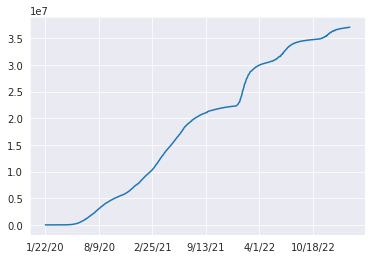

In [9]:
confirmed_by_country.loc['Brazil'][2:].plot()

In [10]:
# Aparece todos os ticks horizontais

#valores = confirmed_by_country.loc['Brazil'][2:]
#ax = sns.lineplot(data=valores)

In [11]:
confirmed_by_country.loc['China']

Lat        1.085292e+03
Long       3.688938e+03
1/22/20    5.480000e+02
1/23/20    6.430000e+02
1/24/20    9.200000e+02
               ...     
3/1/23     4.903524e+06
3/2/23     4.903524e+06
3/3/23     4.903524e+06
3/4/23     4.903524e+06
3/5/23     4.903524e+06
Name: China, Length: 1141, dtype: float64

In [12]:
# Tentando fazer só do primeiro ano

#terco = confirmed.shape[1]/3
#x_limite = list(confirmed.columns[4:int(terco)])

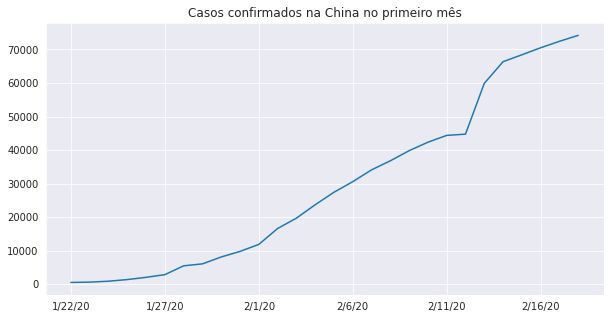

In [13]:
plt.figure(figsize=(10,5))
confirmed_by_country.loc["China"][2:30].plot()
plt.title("Casos confirmados na China no primeiro mês")
#plt.ylim(0,100000)
#plt.xlim(confirmed.columns[4], confirmed.columns[int(terco)])
plt.show()

Os primeiros 30 dias de casos confirmados de covid na China

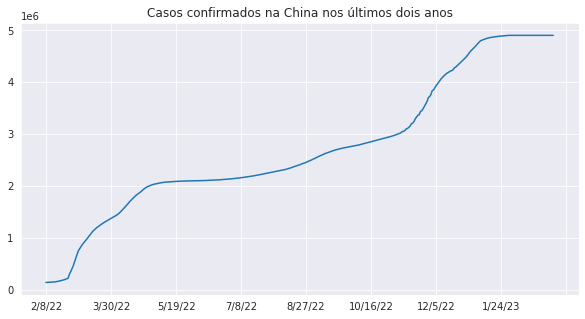

In [14]:
plt.figure(figsize=(10,5))
confirmed_by_country.loc["China"][750:].plot()
plt.title("Casos confirmados na China nos últimos dois anos")
plt.show()

Os dois últimos anos de caso confirmado na china.

# Aula 2: Time Series, tortas e barras

In [15]:
new_cases_china = confirmed_by_country.loc['China'][2:].diff().dropna()

<AxesSubplot:>

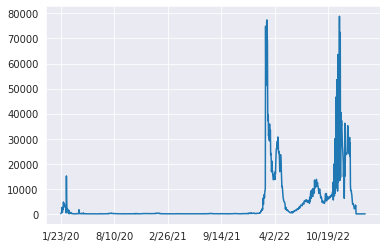

In [16]:
new_cases_china.plot()

In [17]:
deaths_by_country = deaths.groupby('Country/Region').sum()

In [18]:
deaths_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,1931,1931,1931,1933,1933,1933,1933,1933,1933,1933


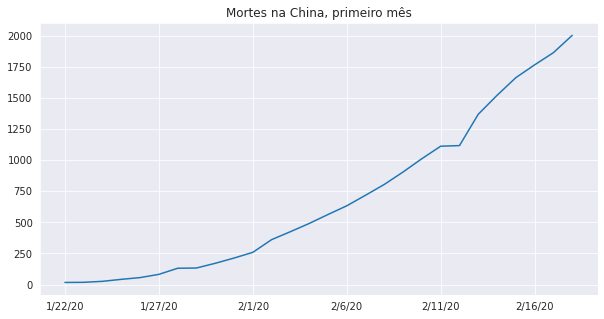

In [19]:
plt.figure(figsize=(10,5))
deaths_by_country.loc["China"][2:30].plot()
plt.title("Mortes na China, primeiro mês")
plt.show()

Text(0.5, 1.0, 'Mortes na China no primeiro mês')

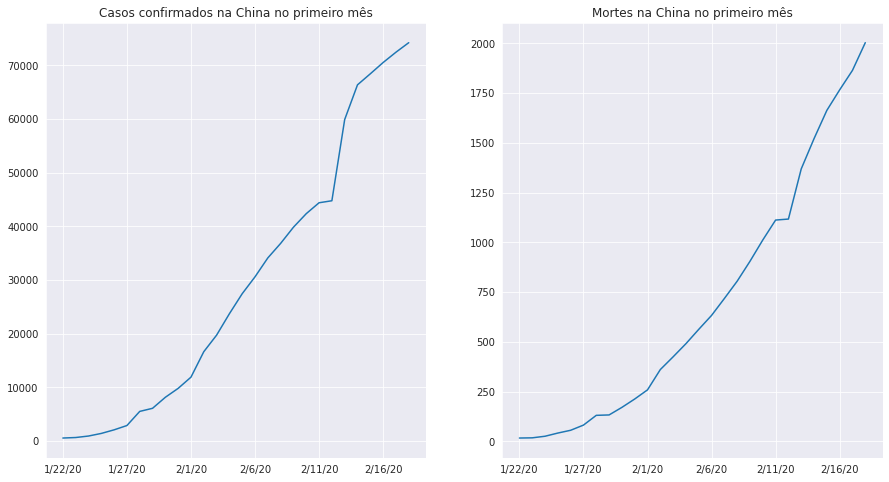

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
confirmed_by_country.loc["China"][2:30].plot()
plt.title("Casos confirmados na China no primeiro mês")
plt.subplot(1, 2, 2)
deaths_by_country.loc["China"][2:30].plot()
plt.title("Mortes na China no primeiro mês")

<AxesSubplot:xlabel='Country/Region'>

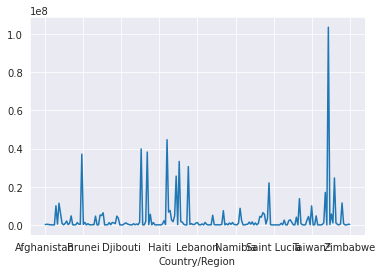

In [21]:
last_date = confirmed.columns[-1]
confirmed_by_country[last_date].plot()

Nesse caso o eixo horizontal não faz sentido ter uma sequência uma vez que cada ponto representa um país.

In [22]:
confirmed_by_country[last_date].sort_values(ascending=False)

Country/Region
US                      103646940
India                    44689327
France                   39839090
Germany                  38210851
Brazil                   37081209
                          ...    
Winter Olympics 2022          535
Holy See                       29
Antarctica                     11
MS Zaandam                      9
Korea, North                    1
Name: 3/5/23, Length: 201, dtype: int64

In [23]:
top_5_paises = confirmed_by_country[last_date].sort_values(ascending=False)[0:5]

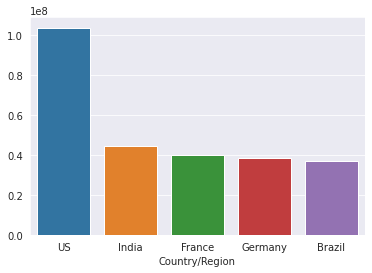

In [24]:
ax = sns.barplot(x=top_5_paises.index, y=top_5_paises.values)

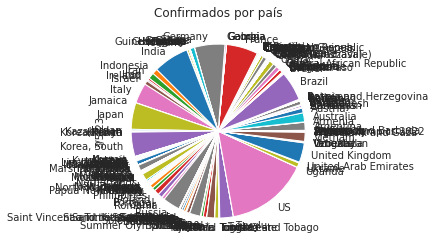

In [25]:
confirmed_by_country[last_date].plot(kind='pie')
plt.title("Confirmados por país")
plt.show()

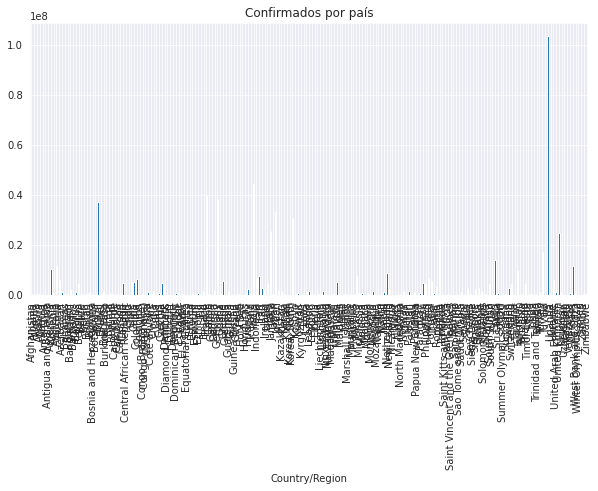

In [26]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

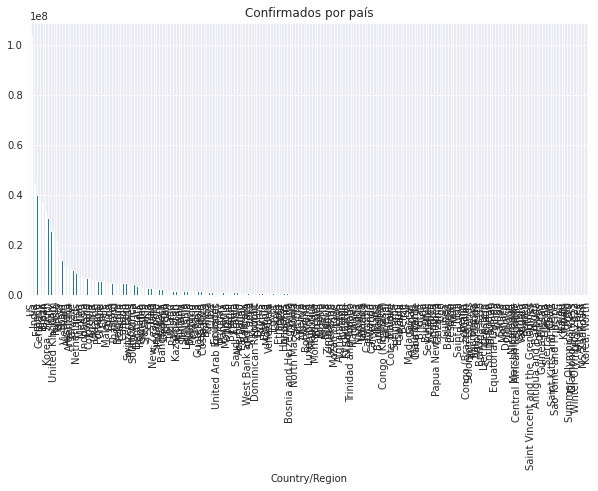

In [27]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending=False).plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

Aqui estão 3 exemplos de gráficos que não são bons para entender o que está acontecendo uma vez que as informações estão se atrapalhando, o melhor nesses casos é diminuir o número de países para ficar mais viável:

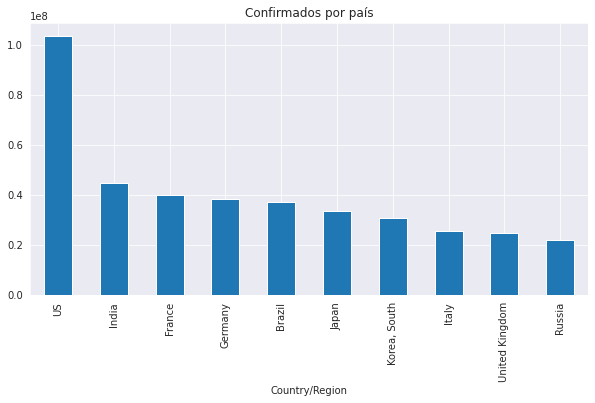

In [28]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

Text(0.5, 1.0, 'Mortes na Brasil no segundo e terceiro mês')

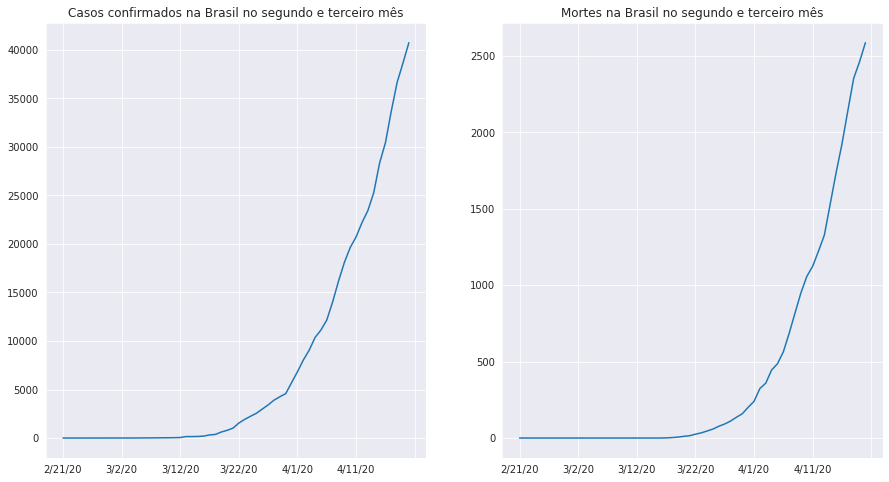

In [29]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
confirmed_by_country.loc["Brazil"][32:92].plot()
plt.title("Casos confirmados na Brasil no segundo e terceiro mês")
plt.subplot(1, 2, 2)
deaths_by_country.loc["Brazil"][32:92].plot()
plt.title("Mortes na Brasil no segundo e terceiro mês")

# Aula 3: fonte de dados e Letalidade

In [30]:
display(deaths.head(), recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1931,1931,1931,1933,1933,1933,1933,1933,1933,1933


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def latest_by_country(data):
    return data.groupby("Country/Region").sum()[last_date].head()

In [32]:
latest_by_country(confirmed)

Country/Region
Afghanistan    209390
Albania        334427
Algeria        271477
Andorra         47875
Angola         105277
Name: 3/5/23, dtype: int64

In [33]:
latest_by_country(deaths)

Country/Region
Afghanistan    7896
Albania        3598
Algeria        6881
Andorra         165
Angola         1933
Name: 3/5/23, dtype: int64

Outra forma de fazer essa função, ao invés de criar uma variável para a última coluna, podemos utilizazr do iloc para escolher **somente** uma coluna de nossa escolha:

In [34]:
def latest_by_country(data):
    return data.groupby("Country/Region").sum().iloc[:,-1]

In [35]:
display(latest_by_country(confirmed))

Country/Region
Afghanistan             209390
Albania                 334427
Algeria                 271477
Andorra                  47875
Angola                  105277
                         ...  
West Bank and Gaza      703228
Winter Olympics 2022       535
Yemen                    11945
Zambia                  343135
Zimbabwe                264127
Name: 3/5/23, Length: 201, dtype: int64

In [36]:
information = [latest_by_country(confirmed), latest_by_country(deaths),
               latest_by_country(recovered)]
combined = pd.concat(information, axis = 1)
combined.columns = ['confirmed','deaths','recovered']
combined.shape

(201, 3)

In [37]:
# taxa de letalidade é expressa em %
# o número de casos letais dentro dos casos que foram letais e não letais
sum_up = combined.sum()

letality_rate_1 = sum_up['deaths']/sum_up['confirmed']
print(letality_rate_1*100)

1.017311691608693


In [38]:
# Vamos fazer a taxa de letalidade por país
combined['letality_rate_1'] = combined['deaths']*100/combined['confirmed']
combined.sort_values(by='letality_rate_1', ascending=False).head()

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
"Korea, North",1,6,0,600.000000
MS Zaandam,9,2,0,22.222222
Yemen,11945,2159,0,18.074508
Sudan,63809,5013,0,7.856259
Syria,57467,3164,0,5.505769


Eu fiz duas aproximações em taxa de letalidade, uma eu fiz no geral e outra eu fiz por país/região e ordenei a por país/região para checar se há compatibilidade entre os valores, e encontrei o registro que na Coreia do Norte somente uma pessoa foi confirmada com a doença porém 6 morreram com ela, é incongruente e interfere com o valor.

Provavelmente é uma questão de não ter informações corretas, e assim gera casos como esse, provavelmente vou desconsiderar esse caso para continuar a fazer as próximas análises estatísticas.

In [39]:
combined.drop('Korea, North', axis = 0, inplace=True)
combined.sort_values(by='letality_rate_1', ascending=False).head()

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
MS Zaandam,9,2,0,22.222222
Yemen,11945,2159,0,18.074508
Sudan,63809,5013,0,7.856259
Syria,57467,3164,0,5.505769
Somalia,27324,1361,0,4.980969


In [40]:
combined.letality_rate_1.mean()

1.4955206531852512

Agora podemos ver que os valores estão mais de acordo, apesar de que foram encontrados de forma diferente e se não me engano esse valor toma valores diferentes.

# Aula 4: Histogramas e resumindo

In [41]:
letality_rate_2 = combined["deaths"] / (combined["deaths"] + combined["recovered"])
combined['letality_rate_2'] = letality_rate_2

combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,209390,7896,0,3.770954,1.0
Albania,334427,3598,0,1.075870,1.0
Algeria,271477,6881,0,2.534653,1.0
Andorra,47875,165,0,0.344648,1.0
Angola,105277,1933,0,1.836109,1.0


In [42]:
sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

1.017310805572218
100.0


fazendo a taxa de letalidade baseada em quantidade de gente que recuperou não podemos tirar muito insight uma vez que os valores desses dados se tornam nulos a partir de um certo dia:

<AxesSubplot:>

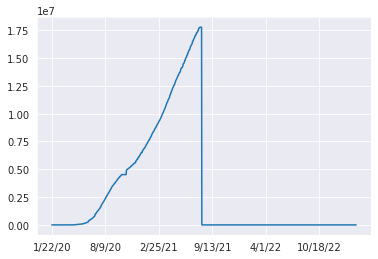

In [43]:
recovered_by_country = recovered.groupby('Country/Region').sum()
recovered_by_country.loc['Brazil'][2:].plot()

Estou dando um exemplo com os dados do Brasil para mostrar que os dados zeram a partir de um dia, mas provavelmente acontece com outros tbm:

<AxesSubplot:title={'center':'Recuperados da China'}>

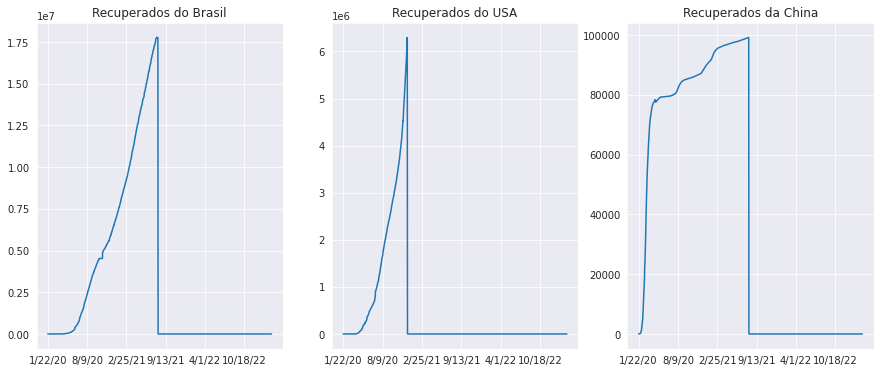

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
plt.title('Recuperados do Brasil')
recovered_by_country.loc['Brazil'][2:].plot()
plt.subplot(1, 3, 2)
plt.title('Recuperados do USA')
recovered_by_country.loc['US'][2:].plot()
plt.subplot(1, 3, 3)
plt.title('Recuperados da China')
recovered_by_country.loc['China'][2:].plot()

assim podemos checar que a segunda taxa de letalidade não pode ser confiável uma vez que os dados não apresentam congruência de forma que pode ser analisada/confiável.

In [45]:
combined.drop('letality_rate_2', axis=1, inplace=True)

In [46]:
combined.sort_values('letality_rate_1', ascending=False)

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
MS Zaandam,9,2,0,22.222222
Yemen,11945,2159,0,18.074508
Sudan,63809,5013,0,7.856259
Syria,57467,3164,0,5.505769
Somalia,27324,1361,0,4.980969
...,...,...,...,...
Holy See,29,0,0,0.000000
Winter Olympics 2022,535,0,0,0.000000
Summer Olympics 2020,865,0,0,0.000000


<AxesSubplot:xlabel='Country/Region'>

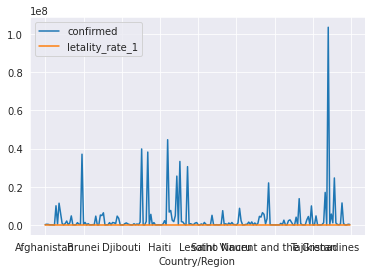

In [47]:
#Leralidade horrenda
combined[['confirmed', 'letality_rate_1']].plot()

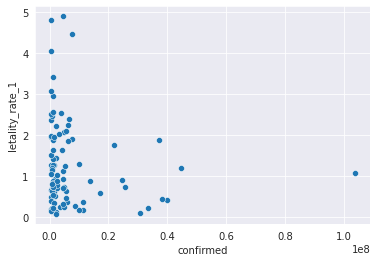

In [48]:
ax = sns.scatterplot(x='confirmed', y='letality_rate_1',
                     data=combined.query("confirmed > 400000"))
ax=ax

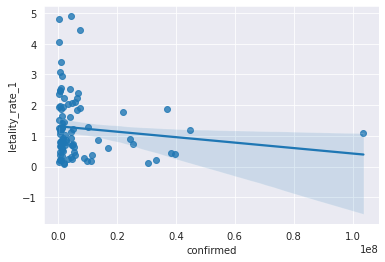

In [49]:
ax = sns.regplot(x='confirmed', y='letality_rate_1',
                     data=combined.query("confirmed > 400000"))
ax=ax

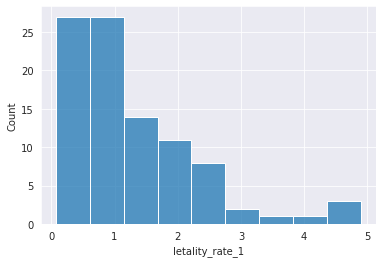

In [50]:
ax = sns.histplot(data=combined.query("confirmed > 400000")['letality_rate_1'])

In [51]:
combined.sort_values("letality_rate_1", ascending=False).query("confirmed > 40").head(10)

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Yemen,11945,2159,0,18.074508
Sudan,63809,5013,0,7.856259
Syria,57467,3164,0,5.505769
Somalia,27324,1361,0,4.980969
Peru,4486832,219493,0,4.891937
Egypt,515698,24809,0,4.810761
Mexico,7470653,333100,0,4.458780
Bosnia and Herzegovina,401636,16279,0,4.053173
Afghanistan,209390,7896,0,3.770954


# Aula 5: Comparações e Análises

In [52]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, '2/20/20'), 
                latest_by_country_at(deaths, '2/20/20'), 
                latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.952136034428466
11.012676814644413


In [53]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.loc["China"]
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.980939568709458
11.050760418724076


In [54]:
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]
 
sum_up = combined_12.loc["China"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [55]:
 confirmed.set_index('Country/Region').loc['China']

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,Anhui,31.8257,117.2264,1,9,15,39,60,70,106,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
China,Beijing,40.1824,116.4142,14,22,36,41,68,80,91,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
China,Chongqing,30.0572,107.8740,6,9,27,57,75,110,132,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
China,Fujian,26.0789,117.9874,1,5,10,18,35,59,80,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
China,Gansu,35.7518,104.2861,0,2,2,4,7,14,19,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
China,Guangdong,23.3417,113.4244,26,32,53,78,111,151,207,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
China,Guangxi,23.8298,108.7881,2,5,23,23,36,46,51,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
China,Guizhou,26.8154,106.8748,1,3,3,4,5,7,9,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
China,Hainan,19.1959,109.7453,4,5,8,19,22,33,40,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483


In [56]:
confirmed.set_index('Country/Region').loc[['US']]

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,NaN,40.0,-100.0,1,1,2,2,5,5,5,...,103376593,103379338,103380730,103396550,103439103,103522479,103583639,103643742,103645674,103646940


In [57]:
is_china = confirmed['Country/Region']== 'China'
display(is_china.head())
is_us = confirmed['Country/Region']== 'US'
display(is_us.head())

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [58]:
confirmed['is_china'] = is_china
confirmed['is_us'] = is_us
confirmed.query('is_china')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,is_china,is_us
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,True,False
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,True,False
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,True,False
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,True,False
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,True,False
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,True,False
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,True,False
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,True,False
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,True,False
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,True,False


In [59]:
confirmed.groupby('is_china').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,is_us
is_china,,,,,,,,,,,,,,,,,,,,,
False,4573.979946,2677.320324,9,14,24,31,45,52,71,82,...,670073450,670138857,670264638,670414362,670627935,670822269,671006108,671060088,671121342,1
True,1085.292300,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524,0


<AxesSubplot:xlabel='is_china'>

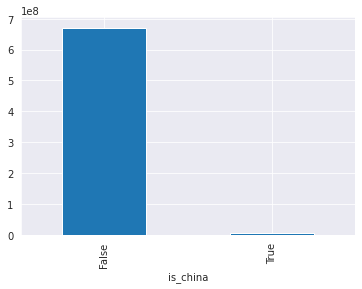

In [60]:
confirmed.groupby('is_china').sum().iloc[:,-2].plot(kind='bar')

In [61]:
confirmed.groupby('is_us').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,is_china
is_us,,,,,,,,,,,,,,,,,,,,,
False,5619.272246,6466.258024,556,656,942,1435,2115,2924,5575,6163,...,571597636,571661651,571771612,571878783,572008980,572142154,572265890,572317938,572377926,34
True,40.000000,-100.000000,1,1,2,2,5,5,5,6,...,103379338,103380730,103396550,103439103,103522479,103583639,103643742,103645674,103646940,0


<AxesSubplot:xlabel='is_us'>

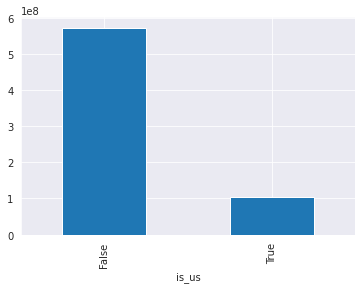

In [62]:
confirmed.groupby('is_us').sum().iloc[:,-2].plot(kind='bar')

In [63]:
import numpy as np

confirmed['is_china']= np.where(confirmed['is_china'],'China', 'Others')
confirmed['is_us']= np.where(confirmed['is_us'],'US', 'Others')
display(confirmed.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,is_china,is_us
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209274,209308,209322,209340,209358,209362,209369,209390,Others,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334378,334380,334391,334408,334408,334427,334427,334427,Others,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271440,271440,271441,271448,271463,271469,271469,271477,Others,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47866,47866,47875,47875,47875,47875,47875,Others,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105205,105255,105255,105277,105277,105277,105277,105277,Others,Others


<AxesSubplot:xlabel='is_us'>

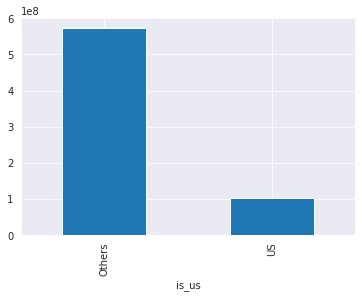

In [64]:
confirmed.groupby('is_us').sum().iloc[:,-2].plot(kind='bar')

A parte de cima é a quantidade de casos confirmados nos EUA e no resto do mundo, enquanto nos dois casos a baixo é quantidade de novos casos de penúltimo para o último dia de dados coletados.

In [65]:
colunas = list(confirmed.groupby("is_us").sum().columns[2:])

<AxesSubplot:xlabel='is_us'>

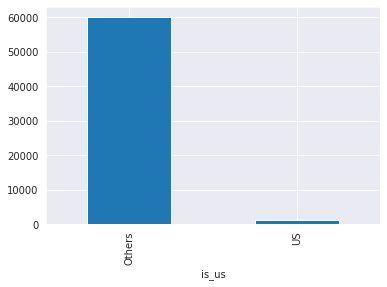

In [66]:
summed = confirmed.groupby('is_us').sum()
summed['delta'] = summed.iloc[:,-1] - summed.iloc[:,-2] 
summed['delta'].plot(kind='bar')

<AxesSubplot:xlabel='is_china'>

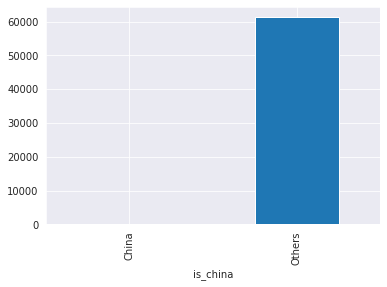

In [67]:
# O mesmo pode ser feito com a China
summed = confirmed.groupby('is_china').sum()
summed['delta'] = summed.iloc[:,-1] - summed.iloc[:,-2] 
summed['delta'].plot(kind='bar')

In [68]:
summed

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,delta
is_china,,,,,,,,,,,,,,,,,,,,,
China,1085.292300,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524,0
Others,4573.979946,2677.320324,9,14,24,31,45,52,71,82,...,670073450,670138857,670264638,670414362,670627935,670822269,671006108,671060088,671121342,61254


In [69]:
# Transpondo o dataset, transformando linha em coluna e vice-versa
summed.T

is_china,China,Others
Lat,1.085292e+03,4.573980e+03
Long,3.688938e+03,2.677320e+03
1/22/20,5.480000e+02,9.000000e+00
1/23/20,6.430000e+02,1.400000e+01
1/24/20,9.200000e+02,2.400000e+01
...,...,...
3/2/23,4.903524e+06,6.708223e+08
3/3/23,4.903524e+06,6.710061e+08
3/4/23,4.903524e+06,6.710601e+08
3/5/23,4.903524e+06,6.711213e+08


<AxesSubplot:>

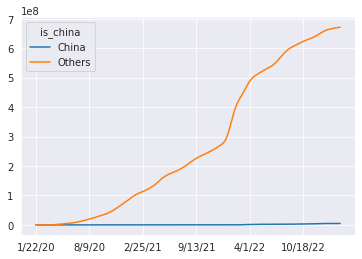

In [70]:
summed.T[2:-1].plot()

Nesse caso o gráfico não nos dá uma dimensão da realidade atual pois a escala do mundo atualmente está muito maior que só a China, mas caso fizermos para os Estados Unidos estará mais visível.

<AxesSubplot:>

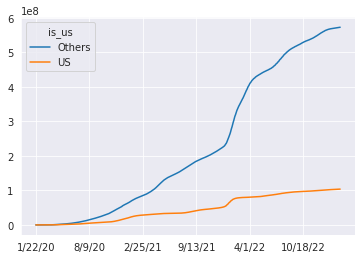

In [71]:
summed = confirmed.groupby('is_us').sum()
summed.T[2:-1].plot()

Agora temos uma comparação dos Estados Unidos com o resto do mundo, vendo o crescimento do número de pessoas confirmadas com a Covid.

<AxesSubplot:>

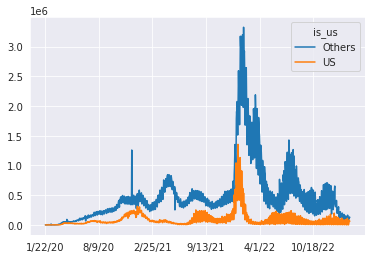

In [72]:
differences = summed.T[2:-2].diff()
differences.plot()

Como a escala de tempo é muito maior que o do exemplo visto na aula, nós temos a relação de quase 3 anos. E vemos que o comportamento mundial é visto em menor escala nos Estados Unidos! Claro que o padrão não é exatamente igual, mas tem padrões. Podemos fazer algo mais específico e fazer esse plot para o intervalo de 30 dias:

<AxesSubplot:>

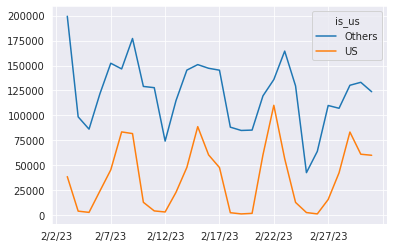

In [73]:
differences = summed.T[-32:-2].diff()
differences.plot()

Novamente temos um comportamento semelhante e em menor escala nos Estados Unidos.

# Aula 2: Juntando bases

Iremos calcular a taxa de incidência, que é definida como o número de casos novos dividido pela população em risco da doença (população exposta) em um espaço geográfico durante um tempo específico.

Vamos fazer esse cálculo com o exemplo dos estados unidos:


In [74]:
cases = confirmed.groupby('is_us').sum().iloc[:,-1]['US']
estimated_population = 337980358
incidence_ratio = cases / estimated_population 
incidence_ratio

0.30666557255969296

In [75]:
cases

103646940

Vou pegar de uma fonte de dados confiável as informações referentes aos dados populacionais dos estados unidos:

In [76]:
un_population = pd.read_csv("https://raw.githubusercontent.com/IgorNascAlves/data-science-primeiros-passos/master/WPP2019_TotalPopulationBySex.csv")

In [77]:
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [78]:
un_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280932 entries, 0 to 280931
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   LocID       280932 non-null  int64  
 1   Location    280932 non-null  object 
 2   VarID       280932 non-null  int64  
 3   Variant     280932 non-null  object 
 4   Time        280932 non-null  int64  
 5   MidPeriod   280932 non-null  float64
 6   PopMale     250876 non-null  float64
 7   PopFemale   250876 non-null  float64
 8   PopTotal    280932 non-null  float64
 9   PopDensity  280932 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 21.4+ MB


Eu vou utilizar a mesma tática usada anteriormente de criar uma coluna para dizer se é um registro dos estados unidos ou não, vou fazer uma query para filtrar os dados só para os estados unidos e depois irei separar a query do ano.

In [79]:
is_usa = un_population['Location']== "United States of America"
un_population['usa'] = is_usa
us_population = un_population.query('usa')
us_population

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,usa
264221,840,United States of America,2,Medium,1950,1950.5,79233.218,79571.179,158804.397,17.361,True
264222,840,United States of America,2,Medium,1951,1951.5,80165.741,80706.523,160872.264,17.587,True
264223,840,United States of America,2,Medium,1952,1952.5,81281.509,81984.517,163266.026,17.848,True
264224,840,United States of America,2,Medium,1953,1953.5,82534.378,83375.618,165909.996,18.137,True
264225,840,United States of America,2,Medium,1954,1954.5,83884.153,84852.237,168736.390,18.446,True
...,...,...,...,...,...,...,...,...,...,...,...
265100,840,United States of America,207,Lower 95 PI,2080,2080.5,180867.429,182887.316,364399.368,39.836,True
265101,840,United States of America,207,Lower 95 PI,2085,2085.5,180347.500,181968.326,362866.210,39.669,True
265102,840,United States of America,207,Lower 95 PI,2090,2090.5,179608.754,180955.028,360961.926,39.461,True
265103,840,United States of America,207,Lower 95 PI,2095,2095.5,178441.143,179873.760,358979.570,39.244,True


In [80]:
us_population.query("Time ==2023")

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,usa
264294,840,United States of America,2,Medium,2023,2023.5,166575.859,170103.372,336679.231,36.806,True
264375,840,United States of America,3,High,2023,2023.5,167278.512,170774.805,338053.317,36.956,True
264456,840,United States of America,4,Low,2023,2023.5,165833.250,169392.807,335226.057,36.647,True
264537,840,United States of America,5,Constant fertility,2023,2023.5,166537.028,170065.772,336602.800,36.798,True
264618,840,United States of America,6,Instant replacement,2023,2023.5,167493.558,170980.935,338474.493,37.002,True
264699,840,United States of America,7,Zero migration,2023,2023.5,165130.377,168662.678,333793.055,36.490,True
264780,840,United States of America,8,Constant mortality,2023,2023.5,166497.340,170003.733,336501.073,36.786,True
264861,840,United States of America,9,No change,2023,2023.5,166477.997,169985.244,336463.241,36.782,True
264942,840,United States of America,10,Momentum,2023,2023.5,166122.069,169596.937,335719.006,36.701,True


Temos inúmeras variantes, então vamos fazer um caso que esteja no padrão de  variante 'Medium':

In [81]:
us_population.query("Time ==2023 & Variant == 'Medium'")

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,usa
264294,840,United States of America,2,Medium,2023,2023.5,166575.859,170103.372,336679.231,36.806,True


In [82]:
us_pop = us_population.query("Time ==2023 & Variant == 'Medium'")['PopTotal'].values[0]

In [83]:
us_pop

336679.231

In [84]:
cases

103646940

In [85]:
incidence_ratio = 100*cases/(us_pop*1000)
incidence_ratio

30.78507090922992

Então, pelos dados encontrados, encontrei uma taxa de incidência de 31% referente a doença da COVID. Mas ao invés de seguir esses passos a diante, agora vou voltar um pouco atrás e fazer como o professor fez.

---

**Seguindo os passos do professor**

Por mais que eu esteja seguindo, eu estou com os dados atualizados, então estou fazendo de acordo com os Estados Unidos e não com a China.

In [86]:
un_population2 = pd.read_csv("https://raw.githubusercontent.com/IgorNascAlves/data-science-primeiros-passos/master/WPP2019_TotalPopulationBySex.csv")
un_population2['PopTotal'] = un_population2['PopTotal']*1000 

In [87]:
un_population_total = un_population2.query("Time == 2023 & Variant == 'Medium'")[['Location', 'PopTotal']].set_index('Location')

In [88]:
combined.join(un_population_total)

,confirmed,deaths,recovered,letality_rate_1,PopTotal
Afghanistan,209390,7896,0,3.770954,41681232.0
Albania,334427,3598,0,1.075870,2858418.0
Algeria,271477,6881,0,2.534653,46053477.0
Andorra,47875,165,0,0.344648,77576.0
Angola,105277,1933,0,1.836109,36148636.0
...,...,...,...,...,...
West Bank and Gaza,703228,5708,0,0.811686,NaN
Winter Olympics 2022,535,0,0,0.000000,NaN
Yemen,11945,2159,0,18.074508,31818240.0
Zambia,343135,4057,0,1.182333,20032801.0


In [89]:
combined.join(un_population_total).sort_values("confirmed", ascending=False)

,confirmed,deaths,recovered,letality_rate_1,PopTotal
US,103646940,1122164,0,1.082679,NaN
India,44689327,530775,0,1.187700,1.419656e+09
France,39839090,166071,0,0.416854,6.574519e+07
Germany,38210851,168397,0,0.440705,8.377454e+07
Brazil,37081209,699276,0,1.885796,2.166418e+08
...,...,...,...,...,...
Diamond Princess,712,13,0,1.825843,NaN
Winter Olympics 2022,535,0,0,0.000000,NaN
Holy See,29,0,0,0.000000,8.080000e+02
Antarctica,11,0,0,0.000000,NaN


In [90]:
# Função para encontrar string no index:

def locate(population, country):
    return population.query(f"Location.str.contains('{country}') and Time ==2023 & Variant == 'Medium'", 
                            engine = 'python')
locate(un_population, 'Taiw')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,usa
50700,158,"China, Taiwan Province of China",2,Medium,2023,2023.5,11854.089,12063.791,23917.88,675.456,False


In [91]:
# assumindo que UNcUnited States of America é igual a John Hopkins US

def rename_location(location):
    if location == 'United States of America':
        return 'US'
    elif location == 'Republic of Korea':
        return 'Korea, South'
    elif location == 'Russian Federation':
        return 'Russia'
    elif location == 'Viet Nam':
        return 'Vietnam'
    elif location == 'China, Taiwan Province of China':
        return 'Taiwan*'
    elif location == 'Iran (Islamic Republic of)':
        return 'Iran'
    return location


un_population_total['location_for_who'] = un_population_total.index.map(rename_location)
un_population_total.query("location_for_who == 'US'").head()

,PopTotal,location_for_who
Location,,
United States of America,336679231.0,US


Essa forma que a gente está fazendo não é a melhor forma pois estamos fazendo de forma braçal, registro a registro para conseguir linkar as duas base de dados.

Tem formas melhores, porém no atual momento estamos lidando com o problema dessa forma.

Na célula de baixo, colocamos a coluna com os nomes atualizados como index para poder fazer o join das duas bases. Depois disso ordenamos por casos confirmados e em ordem decrescente.

In [92]:
un_population_total = un_population_total.set_index("location_for_who")

In [93]:
combined_expanded = combined.join(un_population_total).sort_values("confirmed", ascending=False)

In [94]:
combined_expanded.head()

,confirmed,deaths,recovered,letality_rate_1,PopTotal
US,103646940,1122164,0,1.082679,3.366792e+08
India,44689327,530775,0,1.187700,1.419656e+09
France,39839090,166071,0,0.416854,6.574519e+07
Germany,38210851,168397,0,0.440705,8.377454e+07
Brazil,37081209,699276,0,1.885796,2.166418e+08


A partir daqui podemos calcular a taxa de incidência!

# Aula 3: Taxa de Incidência e Mortalidade

In [95]:
combined_expanded['incidence_ratio'] = (100000*combined_expanded['confirmed'])/combined_expanded['PopTotal']

In [96]:
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,PopTotal,incidence_ratio
US,103646940,1122164,0,1.082679,3.366792e+08,30785.070909
India,44689327,530775,0,1.187700,1.419656e+09,3147.898737
France,39839090,166071,0,0.416854,6.574519e+07,60596.205754
Germany,38210851,168397,0,0.440705,8.377454e+07,45611.531312
Brazil,37081209,699276,0,1.885796,2.166418e+08,17116.365505
Japan,33282370,72779,0,0.218671,1.250813e+08,26608.586370
"Korea, South",30569215,34034,0,0.111334,5.134397e+07,59538.078598
Italy,25603510,188322,0,0.735532,6.014752e+07,42567.860035
United Kingdom,24629840,220222,0,0.894127,6.876594e+07,35816.920107
Russia,22029824,388320,0,1.762701,1.456286e+08,15127.404873


Agora faremos a taxa de mortalidade!

In [97]:
combined_expanded['mortality_ratio'] = (100000*combined_expanded['deaths'])/combined_expanded['PopTotal']

In [98]:
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,PopTotal,incidence_ratio,mortality_ratio
US,103646940,1122164,0,1.082679,3.366792e+08,30785.070909,333.303601
India,44689327,530775,0,1.187700,1.419656e+09,3147.898737,37.387584
France,39839090,166071,0,0.416854,6.574519e+07,60596.205754,252.597951
Germany,38210851,168397,0,0.440705,8.377454e+07,45611.531312,201.012143
Brazil,37081209,699276,0,1.885796,2.166418e+08,17116.365505,322.779756
Japan,33282370,72779,0,0.218671,1.250813e+08,26608.586370,58.185349
"Korea, South",30569215,34034,0,0.111334,5.134397e+07,59538.078598,66.286261
Italy,25603510,188322,0,0.735532,6.014752e+07,42567.860035,313.100217
United Kingdom,24629840,220222,0,0.894127,6.876594e+07,35816.920107,320.248681
Russia,22029824,388320,0,1.762701,1.456286e+08,15127.404873,266.650966


Quando o professor, fala em aula que a taxa de incidência quando comparada com o relatório epidemiológico fica em torno de 0 a 10 e os meus valores variam entre 3000 e 60000, me faz pensar que talvez algo esteja errado, como a quantidade de tempo que se é considerado para fazer o cálculo, mas não entendi o suficiente para complementar essa ideia no cálculo e vou prosseguir na aula, tentando consertar essa discrepância.

# Aula 4: Explorando mais dados

In [99]:
confirmed.sort_values(last_date, ascending=False).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,is_china,is_us
260,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,...,103380730,103396550,103439103,103522479,103583639,103643742,103645674,103646940,Others,US
148,NaN,India,20.593684,78.962880,0,0,0,0,0,0,...,44687428,44687597,44687837,44688105,44688388,44688722,44689046,44689327,Others,Others
131,NaN,France,46.227600,2.213700,0,0,2,3,3,3,...,38565992,38573618,38579269,38583794,38587990,38591184,38591184,38591184,Others,Others
135,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,38111063,38144033,38168908,38189954,38202571,38210850,38210850,38210851,Others,Others
31,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,...,37020531,37038230,37052936,37063464,37063464,37081209,37081209,37081209,Others,Others


In [100]:
#Fonte wiki
hubei_population = 59020000

confirmed_cases = confirmed.set_index('Province/State').loc['Hubei'][last_date]
deaths_cases = deaths.set_index('Province/State').loc['Hubei'][last_date]
recovered_cases = recovered.set_index('Province/State').loc['Hubei'][last_date]

letality_rate1 = deaths_cases/ confirmed_cases * 100
letality_rate2 = deaths_cases/(deaths_cases+ recovered_cases) * 100 # Fadado a dar errado por causa da falta de informação

print('Letality rate 1: {}'.format(letality_rate1))
print('Letality rate 2: {}'.format(letality_rate2))

Letality rate 1: 6.259444621591272
Letality rate 2: 100.0


In [101]:
incidence_ratio = confirmed_cases / hubei_population*100000
mortality_rate = deaths_cases / hubei_population*100000
print('Conficiente de Incidência em Hubei: {}'.format(incidence_ratio))
print('Coeficiente de mortalidade em Hubei: {}'.format(mortality_rate))

Conficiente de Incidência em Hubei: 122.2145035581159
Coeficiente de mortalidade em Hubei: 7.649949169772959


In [102]:
# Outro cálculo de acordo com outra fonte de informação: Burden Influeza, nos EUA, coeficiente de incidência
incidence_ratio = 35520883/(us_pop*1000)*100000
mortality_rate = 34157/(us_pop*1000)*100000
print('Conficiente de Incidência de influenza nos EUA: {}'.format(incidence_ratio))
print('Conficiente de mortalidade de influenza nos EUA: {}'.format(mortality_rate))

Conficiente de Incidência de influenza nos EUA: 10550.363589252704
Conficiente de mortalidade de influenza nos EUA: 10.145264945077649


In [103]:
grouped_per_day = pd.DataFrame([confirmed.sum()[4:-2],
             recovered.sum()[4:],
             deaths.sum()[4:]],
            index = ['Confirmed', 'Recovered','Deaths']).T

/tmp/ipykernel_594/2693761741.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_per_day = pd.DataFrame([confirmed.sum()[4:-2],
/tmp/ipykernel_594/2693761741.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  recovered.sum()[4:],
/tmp/ipykernel_594/2693761741.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  deaths.sum()[4:]],


In [104]:
grouped_per_day['letality_rate_1'] = grouped_per_day['Deaths']/grouped_per_day['Confirmed']
grouped_per_day['letality_rate_2'] = grouped_per_day['Deaths']/(grouped_per_day['Deaths']+grouped_per_day['Recovered'])

In [105]:
grouped_per_day.head()

,Confirmed,Recovered,Deaths,letality_rate_1,letality_rate_2
1/23/20,657,32,18,0.027397,0.360000
1/24/20,944,39,26,0.027542,0.400000
1/25/20,1437,42,42,0.029228,0.500000
1/26/20,2120,56,56,0.026415,0.500000
1/27/20,2929,65,82,0.027996,0.557823


<AxesSubplot:>

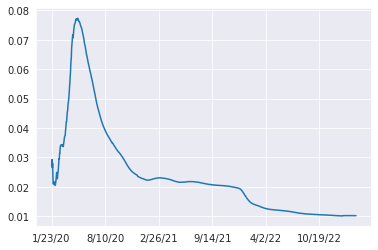

In [106]:
grouped_per_day['letality_rate_1'].plot()

<AxesSubplot:>

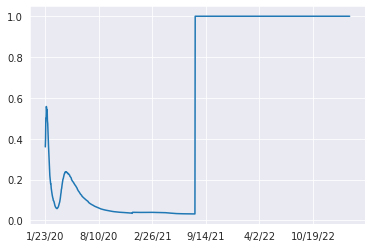

In [107]:
grouped_per_day['letality_rate_2'].plot()

Esse gráfico está muito estranho devido a falta de informação a partir de uma certa data do banco de dados, não que todos os países tenham parado ter a informação ao mesmo tempo, mas maior parte acabou simultaneamente.

<AxesSubplot:>

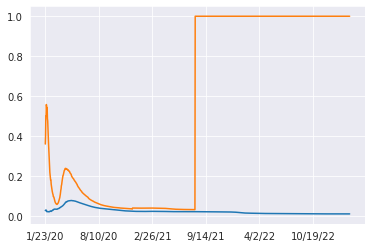

In [108]:
grouped_per_day['letality_rate_1'].plot()
grouped_per_day['letality_rate_2'].plot()

O professor dá uma floreada nos gráficos, mas como os meus gráficos estão  incompatíveis com a realidade e faltando informações vitais para que seja possível ter uma compreensão mais detalhada sobre a situação.